# Check dataflow

Example codes to visually check:
- data augmentations
- data batching

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import torch
import torchvision

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

os.environ['CIFAR10_ROOT'] = '/media/user/fast_storage/tensorpack_data/cifar10_data/'
sys.path.append(".")

CIFAR10_ROOT = os.environ['CIFAR10_ROOT']

In [3]:
train_ds = torchvision.datasets.CIFAR10(root=CIFAR10_ROOT, train=True, download=False)

Simple data visualization

In [4]:
from common.dataflow_visu_utils import display_basic_dataset

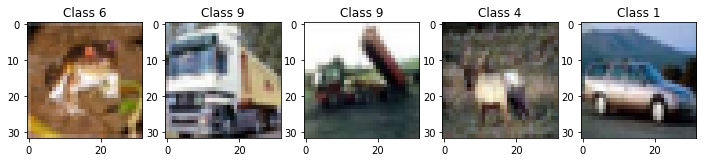

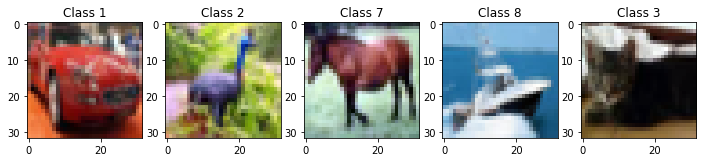

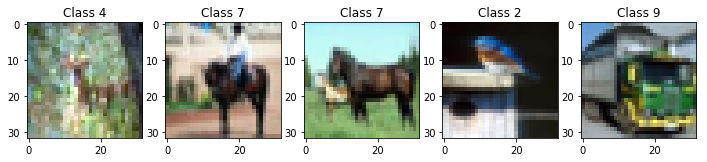

In [5]:
display_basic_dataset(train_ds, max_datapoints=15)

## Setup and check data augmentations

In [6]:
from torchvision.transforms import Compose, Normalize, ToTensor, Lambda
from common.dataflow import TransformedDataset
from common.imgaug import ToNumpy, RandomOrder, RandomChoice, RandomFlip
from common.imgaug import RandomAffine, RandomAdd, RandomCrop, ColorJitter, CenterCrop
from common.imgaug import Brightness, Contrast, Saturation
from common.imgaug import restore_transform

Restore a transform from json string

In [7]:
transforms_json_str = '''{"Compose":
                            {"transforms": [{"ToNumpy": {}},
                                            {"RandomChoice": {"transforms": [
                                                {"RandomAffine": {"translate": [0.05, 0.05],
                                                                    "rotation": [-60, 60],
                                                                    "scale": [0.95, 1.05]}},
                                                {"RandomFlip": {"mode": "h", "proba": 0.5}},
                                                {"RandomFlip": {"mode": "v", "proba": 0.5}}]}},
                                            {"ToTensor": {}},
                                            {"ColorJitter": {"brightness": 0.4, 
                                                             "contrast": 0.4, 
                                                             "saturation": 0.4}},
                                            {"Normalize": {"std": [0.229, 0.224, 0.225],
                                                           "mean": [0.485, 0.456, 0.406]}}
                                            ]
                            }
                        }'''


custom_transforms = {
    "ToNumpy": ToNumpy,    
    "RandomCrop": RandomCrop,
    "CenterCrop": CenterCrop,
    "RandomChoice": RandomChoice,
    "RandomAffine": RandomAffine,
    "RandomFlip": RandomFlip,
    "ColorJitter": ColorJitter,
    "Brightness": Brightness,
    "Contrast": Contrast,    
}

In [8]:
train_transforms = restore_transform(transforms_json_str, custom_transforms)

In [9]:
train_transforms.transforms

In [10]:
aug_train_ds = TransformedDataset(train_ds, x_transforms=train_transforms)

In [11]:
from common.dataflow_visu_utils import display_data_augmentations

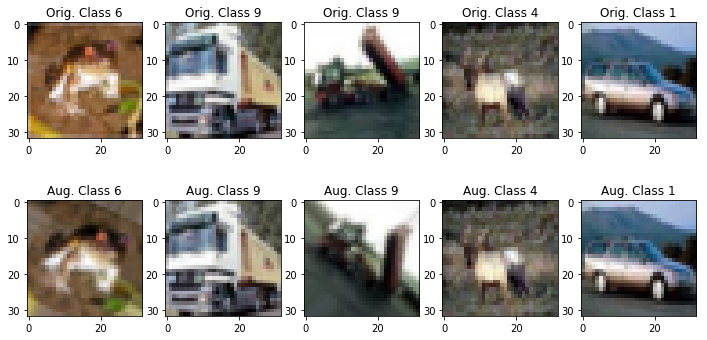

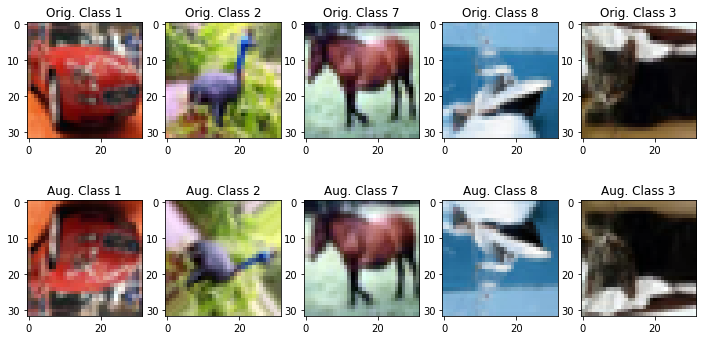

In [12]:
display_data_augmentations(train_ds, aug_train_ds, max_datapoints=10)

## Setup and check complete dataflow : augmentations and batching